In [1]:
import sys
sys.path.append('../')

import numpy as np
from qiskit import IBMQ, Aer, QuantumCircuit
import matplotlib.pyplot as plt
from main import device_process_measurement_tomography, Quantities, Cross_Quantities, measurement_process_tomography
from qiskit.compiler import transpile
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.providers.aer.noise import NoiseModel

In [2]:
IBMQ.load_account()
# provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-research-2', group='csic-1', project='main')

In [3]:
backend = provider.get_backend('ibm_lagos')
simulator = Aer.get_backend('aer_simulator')
noise_model = NoiseModel.from_backend(backend)

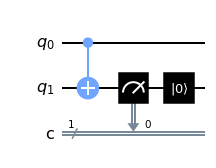

In [4]:
qc = QuantumCircuit(2,1)
qc.cx(0,1)
qc.measure(1,0)
qc.reset(1)
qc.draw(output='mpl')

In [5]:
mpt = measurement_process_tomography( 1, 1, 1 ) 
qcs = mpt.circuits( qc )
results = simulator.run(qcs,shots=1e3).result()
mpt.fit( results )

[[array([[ 9.99799475e-01+0.00000000e+00j, -7.03835187e-03+4.84060120e-03j,
          -7.03835187e-03-4.84060120e-03j,  7.29848376e-05+0.00000000e+00j],
         [ 4.74734389e-03-3.32814601e-03j, -1.05466045e-03+8.70816538e-04j,
          -4.95337223e-05+4.44698449e-07j,  1.16416174e-05-1.02531056e-06j],
         [ 4.74734389e-03+3.32814601e-03j, -4.95337223e-05-4.44698449e-07j,
          -1.05466045e-03-8.70816538e-04j,  1.16416174e-05+1.02531056e-06j],
         [ 3.36205983e-05+0.00000000e+00j, -7.90666465e-06+6.24521371e-07j,
          -7.90666465e-06-6.24521371e-07j,  1.87691153e-06+0.00000000e+00j]]),
  array([[ 1.36205609e-09+0.00000000e+00j, -8.02462548e-09-4.84895615e-08j,
          -8.02462548e-09+4.84895615e-08j,  3.50193696e-06+0.00000000e+00j],
         [-6.28864353e-09-1.66199132e-07j, -5.26275030e-07-5.08749737e-06j,
           6.23507674e-06+1.96265328e-05j,  2.52650247e-04+5.82053970e-04j],
         [-6.28864353e-09+1.66199132e-07j,  6.23507674e-06-1.96265328e-05j,
    

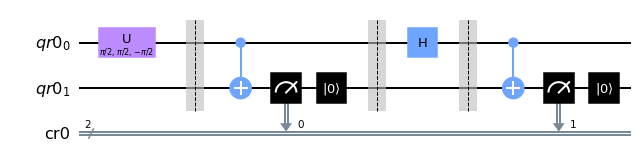

In [6]:
qcs[13].draw(output='mpl')

In [76]:
# job = backend.run( transpile(qcs, backend, optimization_level=2), shots=1000 )
# print( job.job_id() )
# print( job.status() )
#'631631fc76e4d11a360b411a' 1p
#'631632cd76f8e3964495d4f9' 1p lvl2
#'6316328f76f8e325a895d4f6' 2p
#'631632b276f8e3156995d4f8' 2p lvl2

In [77]:
# job.status()

<JobStatus.DONE: 'job has successfully run'>

In [7]:
job = backend.retrieve_job('631632cd76f8e3964495d4f9')

In [8]:
results = job.result()

In [9]:
chois = mpt.fit( results )
chois

[[array([[ 9.65732796e-01+0.j        ,  6.57709757e-03-0.00120518j,
           6.57709757e-03+0.00120518j,  2.21579554e-03+0.j        ],
         [ 7.24262051e-03+0.00050971j,  5.44524450e-03+0.01984347j,
          -4.83486105e-03-0.00018325j,  4.36444910e-04-0.00146216j],
         [ 7.24262051e-03-0.00050971j, -4.83486105e-03+0.00018325j,
           5.44524450e-03-0.01984347j,  4.36444910e-04+0.00146216j],
         [ 1.14733683e-02+0.j        ,  1.08847975e-03+0.00387427j,
           1.08847975e-03-0.00387427j,  1.00807944e-02+0.j        ]]),
  array([[ 0.01947372+0.j        ,  0.00333706+0.00193114j,
           0.00333706-0.00193114j,  0.04577969+0.j        ],
         [-0.00255456-0.00349777j,  0.00750465+0.02024894j,
           0.00882667+0.00310367j, -0.01998567+0.00209024j],
         [-0.00255456+0.00349777j,  0.00882667-0.00310367j,
           0.00750465-0.02024894j, -0.01998567-0.00209024j],
         [ 0.00330876+0.j        , -0.01100269-0.00459807j,
          -0.01100269+0.004